# import libraries and data, preparations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# defining path
path=r'/Users/ru/Desktop/CF/06_Achievement 6_VE'

In [5]:
# import data
df_ve = pd.read_pickle(os.path.join(path,'02_06_Data','2.2_06_Prepared Data',
                                 'df_ve_clean_y_n.pkl'))

In [6]:
df_ve.head(5)

,Unnamed: 0,Stimmart,Adresse,BezNr,BezNa,WahlBez,WahlBezArt,BWB,AGHWK,BTWK,...,Stimmber A2,Stimmber A3,TeilN,TeilN B1,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein,Unnamed: 20,Ergebnis
0,0,Stimme,01W100,1,Mitte,100,W,011A,1,75,...,741,0,519,12,11,508,299,209,NaN,yes
1,1,Stimme,01W101,1,Mitte,101,W,011B,1,75,...,490,0,366,10,6,360,182,178,NaN,yes
2,2,Stimme,01W102,1,Mitte,102,W,011B,1,75,...,692,0,406,10,8,398,217,181,NaN,yes
3,3,Stimme,01W103,1,Mitte,103,W,011C,1,75,...,569,0,329,10,9,320,159,161,NaN,no
4,4,Stimme,01W104,1,Mitte,104,W,011D,1,75,...,639,0,522,17,10,512,263,249,NaN,yes


In [7]:
df_ve.columns

Index(['Unnamed: 0', 'Stimmart', 'Adresse', 'BezNr', 'BezNa', 'WahlBez',
       'WahlBezArt', 'BWB', 'AGHWK', 'BTWK', 'OstWest', 'Stimmber  total',
       'Stimmber A1', 'Stimmber A2', 'Stimmber A3', 'TeilN', 'TeilN B1',
       'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein',
       'Unnamed: 20', 'Ergebnis'],
      dtype='object')

In [8]:
# reduce dataset: nummeric values only

In [9]:
selected_cols = ['Stimmber  total', 'TeilN',  'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein'] 
df_clust = df_ve[selected_cols].copy()

In [10]:
df_clust.head(5)

,Stimmber total,TeilN,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein
0,1621,519,11,508,299,209
1,953,366,6,360,182,178
2,1283,406,8,398,217,181
3,1011,329,9,320,159,161
4,1277,522,10,512,263,249


In [11]:
df_clust.shape

(3764, 6)

# elbow technique

In [12]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 6) 
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_clust).score(df_clust) for i in range(len(kmeans))] 


In [14]:
score


[-1389308574.6206162,
 -290593139.7799201,
 -208599863.61055833,
 -133444124.37511262,
 -103666902.37796246]

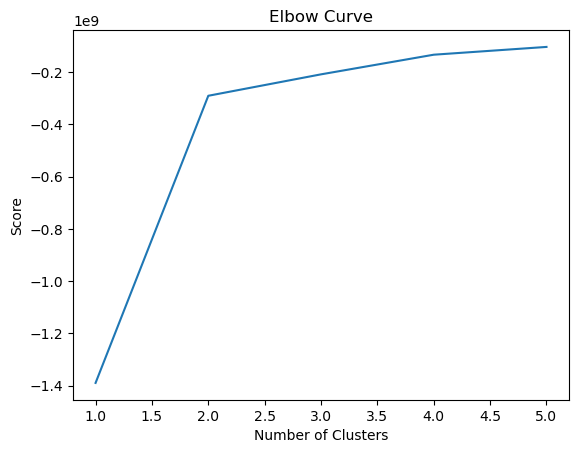

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve suggests to continue with two clusters, since the curve bends at point "2" of the x axis (number of clusters)

# k-means clustering

In [16]:
# Create the k-means object with two clusters

kmeans = KMeans(n_clusters = 2) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_clust)

KMeans(n_clusters=2)

In [18]:
df_clust['clusters'] = kmeans.fit_predict(df_clust)

In [19]:
df_clust.head(100) # at first glance only cluster 1 appears

,Stimmber total,TeilN,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein,clusters
0,1621,519,11,508,299,209,0
1,953,366,6,360,182,178,0
2,1283,406,8,398,217,181,0
3,1011,329,9,320,159,161,0
4,1277,522,10,512,263,249,0
...,...,...,...,...,...,...,...
95,1020,438,15,423,306,117,0
96,874,369,11,358,254,104,0
97,816,325,4,321,236,85,0
98,804,358,7,351,272,79,0


In [20]:
# check amount of clusters with value counts
df_clust['clusters'].value_counts()

clusters
0    2249
1    1515
Name: count, dtype: int64

# plot results

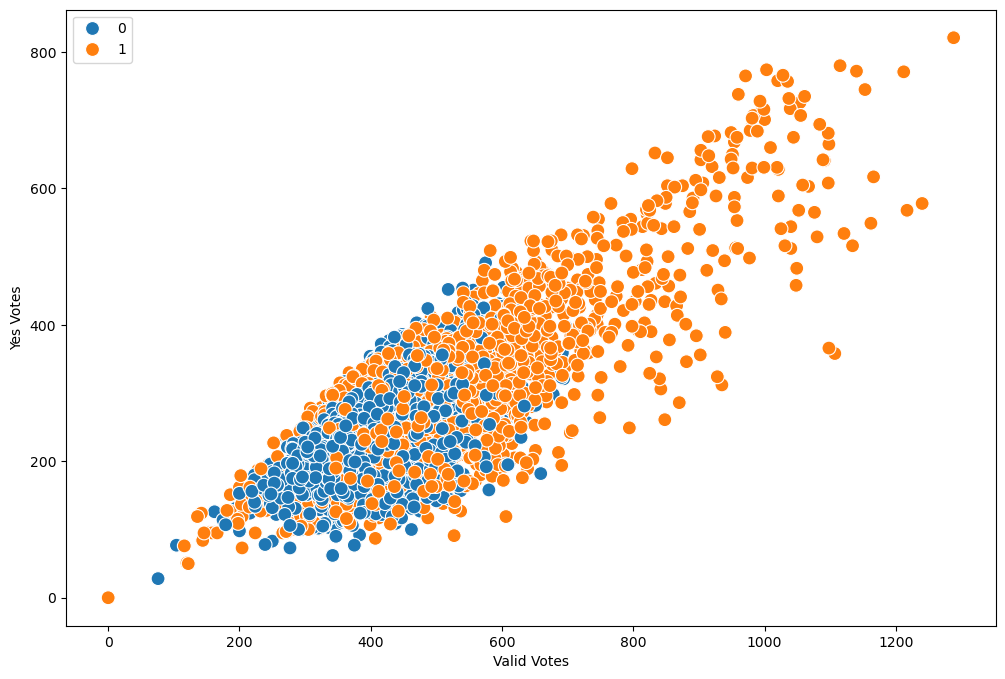

In [21]:
# Plot the clusters for the "Yes Votes" and "Valid Votes" variables - I leave the comments of the exercise for 
# future refrence

plt.figure(figsize=(12,8))
clust_glt_yes = sns.scatterplot(x=df_clust['Glt Stimme'], y=df_clust['Stimme Ja'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
clust_glt_yes.grid(False) # This removes the grid from the background.
plt.xlabel('Valid Votes') # Label x-axis.
plt.ylabel('Yes Votes') # Label y-axis.
plt.show()

In [22]:
# save image
clust_glt_yes.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', '.png'))


<Figure size 1200x800 with 0 Axes>

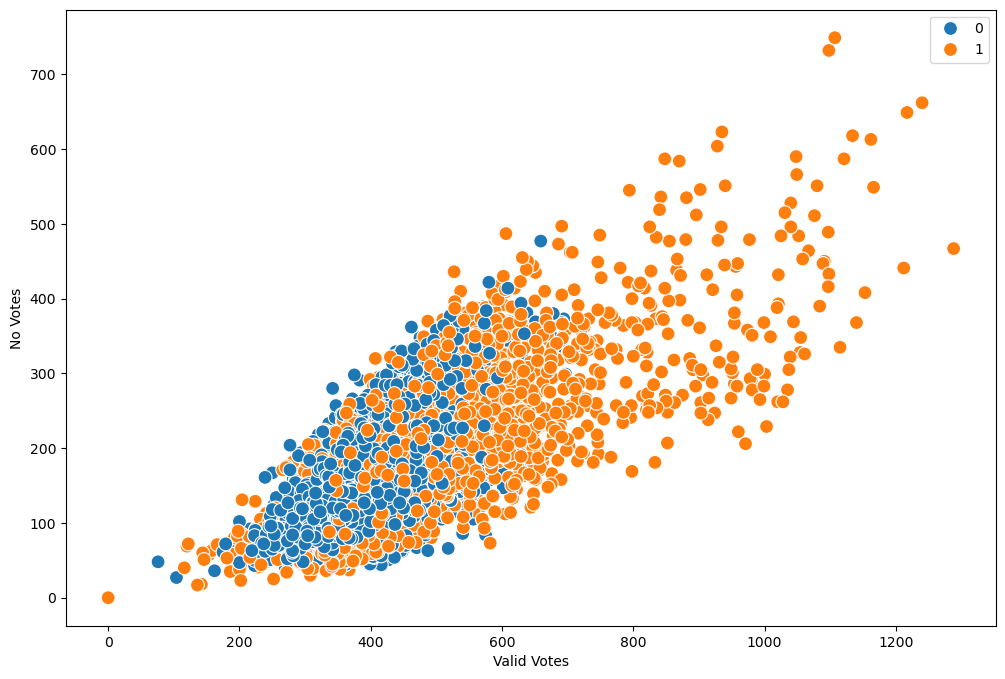

In [26]:
# Plot the clusters for the "No Votes" and "Valid Votes" variables.
plt.figure(figsize=(12,8))
clust_glt_no = sns.scatterplot(x=df_clust['Glt Stimme'], y=df_clust['Stimme  Nein'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
clust_glt_no.grid(False) # This removes the grid from the background.
plt.xlabel('Valid Votes') # Label x-axis.
plt.ylabel('No Votes') # Label y-axis.
plt.show()


In [27]:
# save image
clust_glt_no.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'clust_glt_.png'))

INTERPRETATION
the dots are the different voting districts (voting district z has x numbers of valid votes)  
The colours/clusters represent similarities based on calculations of the different dots (voting districts) to each other.
The Information of the size of the voting district is not relevant in this context. 
The more interesting information comes with the categorical variables like geographical information or the categories West/East. This statistical approach does not lead to informative insights in the case of this dataset.


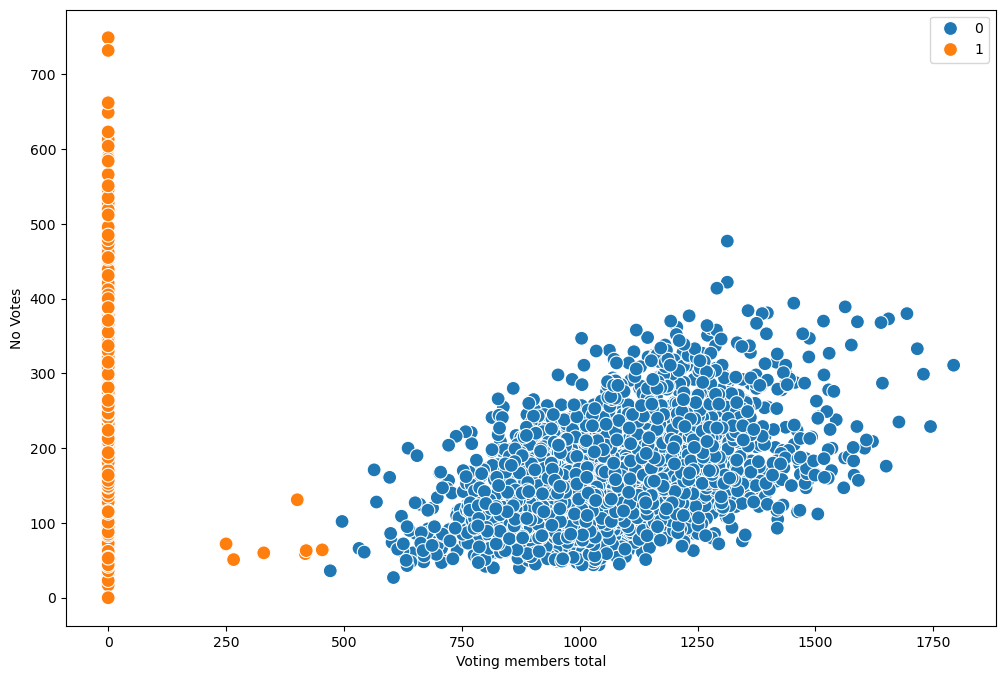

In [28]:
# Plot the clusters for the "No Votes" and "Voting members total" variables.

plt.figure(figsize=(12,8))
clust_total_no = sns.scatterplot(x=df_clust['Stimmber  total'], y=df_clust['Stimme  Nein'], hue=kmeans.labels_, s=100)
clust_total_no.grid(False) 
plt.xlabel('Voting members total') 
plt.ylabel('No Votes') 
plt.show()

In [30]:
# save image
clust_total_no.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'clust_total_no.png'))

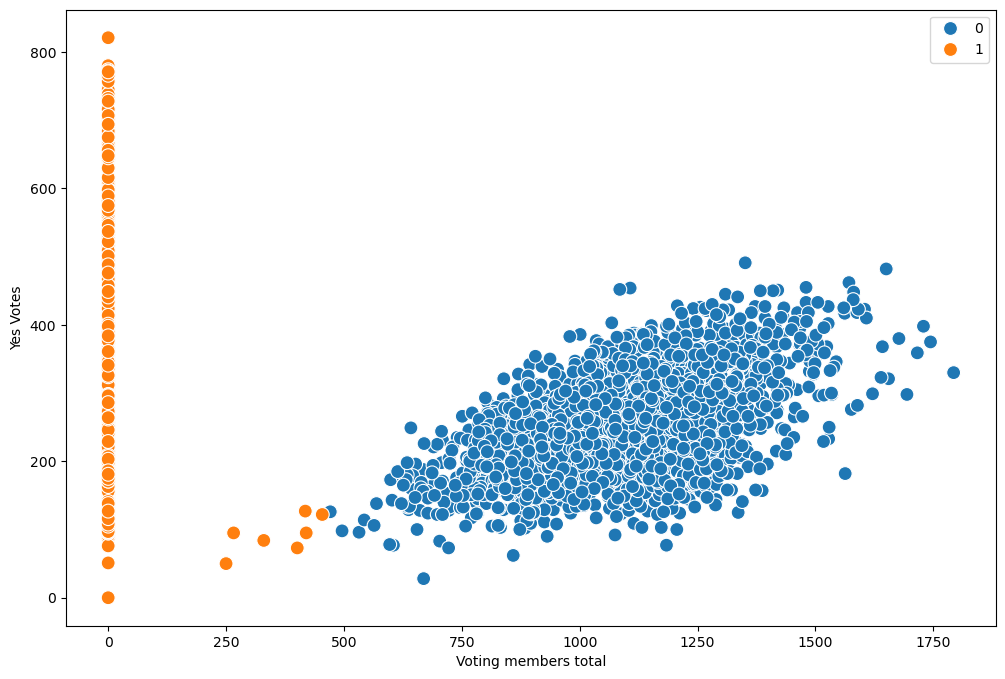

In [31]:
# Plot the clusters for the "Yes Votes" and "Voting members total" variables.

plt.figure(figsize=(12,8))
clust_total_yes = sns.scatterplot(x=df_clust['Stimmber  total'], y=df_clust['Stimme Ja'], hue=kmeans.labels_, s=100)

clust_total_yes.grid(False) 
plt.xlabel('Voting members total') 
plt.ylabel('Yes Votes') 
plt.show()

In [32]:
# save image
clust_total_yes.figure.savefig(os.path.join(path, '04_06_Analysis','4.3_06_visualizations', 'clust_total_yes.png'))

INTERPRETATION
In the two scatterplots above (yes and no in combination with voting menbers total) I see twi clearly sepersated clusters - in contrary to the two scatterplots above. I would assume that this difference has something to do with the fact that there is a significant difference between voting members total (stimmberechtigte) and actual voters (gültige stimmen) Still I cant give a clear interpretation of what I see - this confirms my assumption that other than numerical information plays an important role in the informative interpretation of this dataset.

In [33]:
# assign colournames to cluster
df_clust.loc[df_clust['clusters'] == 1, 'cluster'] = 'orange'
df_clust.loc[df_clust['clusters'] == 0, 'cluster'] = 'blue'

In [34]:
df_clust.columns

Index(['Stimmber  total', 'TeilN', 'Unglt Stimme', 'Glt Stimme', 'Stimme Ja',
       'Stimme  Nein', 'clusters', 'cluster'],
      dtype='object')

# Calculate descriptive statistics 

In [59]:

df_clust.groupby('cluster').agg({'Stimmber  total':['mean', 'median'], 
                         'Glt Stimme':['mean', 'median'], 
                         'Stimme Ja':['mean', 'median'],
                          'Stimme  Nein':['mean', 'median']})

Stimmber  total          Glt Stimme          Stimme Ja         \
                   mean  median        mean median        mean median   
cluster                                                                 
blue        1087.176968  1094.0  416.197866  412.0  250.148066  245.0   
orange         1.675908     0.0  538.362376  514.0  312.453465  296.0   

        Stimme  Nein         
                mean median  
cluster                      
blue      166.049800  158.0  
orange    225.908911  219.0

INTERPRETATION AND FURTHER RECOMMENDATIONS

As mentioned before I think that the size of a voting district (aka number of valid votes per unit) is not an interesting information in this context. Neither are the mean and the median, because it is all about absolute numbers in elections. What is however, an intersting insight: allthough the dataset fulfills the technical requirements for this analysis, in terms of size and number of numerical variable etc it does not seem to be suitable for this form of statistical analysis.
Important steps for further analysis would be the integration of categorical variables such as geographical information (how was the vote in the different districts, are there districts with clear or narrow majorities, how are the majority ratios in different districts and does the category W (west) and O (east) show any interesting results. 
